In [2]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the data
data_path = r"C:\Users\eissa\dd\source code\summary_angles.csv"  # Replace with the path to your CSV file
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
df.head()

,patient_label,avg_hip_knee_angle,avg_knee_ankle_angle,avg_hip_knee_angle_r,avg_knee_ankle_angle_r,avg_left_shoulder_elbow_angle,avg_left_elbow_wrist_angle,avg_right_shoulder_elbow_angle,avg_right_elbow_wrist_angle,avg_cluster
0,OAW01-bottom,93.450548,92.005697,93.150015,91.587052,90.800756,94.100709,92.644709,94.812927,0.842929
1,OAW01-top,93.960613,91.438832,91.954665,91.237872,89.036201,93.860798,92.027952,95.496845,0.928844
2,OAW02-bottom,91.310418,90.208461,95.979585,93.700264,94.861885,92.233444,88.850355,101.169782,1.034574
3,OAW02-top,91.580672,90.076758,93.432040,92.147240,92.435445,90.122316,92.004988,100.166918,1.068343
4,OAW03-bottom,89.749398,87.097465,93.863910,87.680430,92.318725,92.940827,84.379911,87.584042,1.105874


In [5]:
# Ensure only numeric columns are used for feature selection and clustering
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Feature selection using Variance Threshold
selector = VarianceThreshold(threshold=0.1)  # Adjust the threshold as needed
selected_features = selector.fit_transform(df[numeric_columns])

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the dataframe
df['Cluster'] = clusters

In [6]:
# Save the clustered data to a new CSV file
clustered_data_path = 'clustered_summary_angles.csv'
df.to_csv(clustered_data_path, index=False)

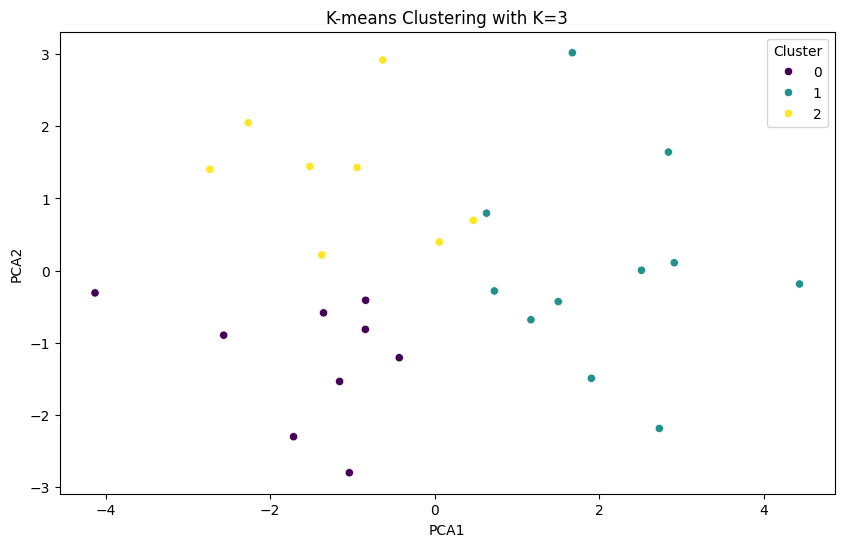

In [7]:
# Visualize the clusters
# For visualization, we need to reduce the dimensions to 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA features and cluster labels
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('K-means Clustering with K=3')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()